<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from sklearn.datasets import load_diabetes
import pandas as pd

import numpy as np



In [82]:
# model = LinearRegression()
diabetes = load_diabetes()


In [83]:
df_x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = diabetes.target
df_x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [84]:


#age, sex, bmi, bp, s1, s2, s3, s4, s5, s6 ,2867기준
# df_x.drop('age', axis=1, inplace=True) #2828 but 가시성을 위해 끼워 넣음
df_x.drop('sex', axis=1, inplace=True) #2973 높아짐
df_x.drop('bmi', axis=1, inplace=True) #3194 높아짐
# df_x.drop('bp', axis=1, inplace=True) #2879
# df_x.drop('s1', axis=1, inplace=True) #2838
# df_x.drop('s2', axis=1, inplace=True) #2858
# df_x.drop('s3', axis=1, inplace=True) #2858
# df_x.drop('s4', axis=1, inplace=True) #2843
df_x.drop('s5', axis=1, inplace=True) #3271 높아짐
# df_x.drop('s6', axis=1, inplace=True) #2886

In [85]:

from sklearn.metrics import mean_squared_error

In [86]:
# predictions=model.predict(x_test)

# mse = mean_squared_error(y_test, predictions)

# mse

In [87]:
X=np.array(df_x)
y=np.array(df_y)

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
type(df_x)

pandas.core.frame.DataFrame

In [91]:

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 7) (353,)
(89, 7) (89,)


In [92]:

W = np.random.rand(7) #랜덤값을 가진 변수 생성
b = np.random.rand()
print(W)

def model(X, W, b):   #모델 함수 생성
    predictions = 0
    for i in range(0, 7):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

[0.63847586 0.3745554  0.46029604 0.11171665 0.92753494 0.0697007
 0.19873925]


In [93]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse


In [94]:
def loss(X, W, b, y): 
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L    


In [95]:
def gradient(X, W, b, y):
    N = len(W) 
    y_pred = model(X_train, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW,db


In [96]:
LEARNING_RATE = 0.01 #learning rate 지정

losses = []

for i in range(1, 1001):  #정의된 손실함수와 기울기 함수로 모델을 학습
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 4995.6339
Iteration 200 : Loss 4238.2067
Iteration 300 : Loss 4081.4117
Iteration 400 : Loss 4008.8134
Iteration 500 : Loss 3968.7906
Iteration 600 : Loss 3944.2415
Iteration 700 : Loss 3927.7937
Iteration 800 : Loss 3915.8404
Iteration 900 : Loss 3906.4783
Iteration 1000 : Loss 3898.6623


In [97]:
# learning_rate=1e-2 #꽤 작은 수인데, 발산하는 경우엔, 1e-3 등으로 바꾸어서 실행하면 됩니다.
# f = lambda x : loss_func(x_train, y_train)
# print("initial error value=", loss_func(x_train, y_train),", initial w=", W, "\nb=",b)

# for step in range(1001): # 8001이라는 것은 최대 몇번 학습을 반복하는가에 대한 것입니다. 참고로 학습 한번 실행시마다 1 에폭이라 부릅니다.
#     W -= learning_rate*numerical_derivative(f, W)
#     b -= learning_rate*numerical_derivative(f, b)
    
#     if(step % 100 == 0): #400에폭마다 로깅
#         print("step=", step, ", error value=", loss_func(x_train, y_train), ", w=", W, ", b=",b)

In [98]:
from sklearn.metrics import mean_squared_error

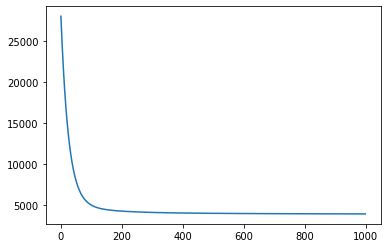

In [99]:
from matplotlib import pyplot as plt

plt.plot(losses)
plt.show()

In [100]:
prediction = model(X_test, W, b)  #test 데이터에 대한 성능 평가
mse = loss(X_test, W, b, y_test)
mse

3810.581839282148

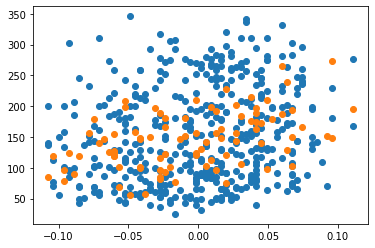

In [101]:
plt.scatter(X[:,0], y) #예측 데이터 시각화
plt.scatter(X_test[:, 0], prediction)
plt.show()